We are given a dataset and are asked to predict house prices

# Real Estate - Price Predictor

It is supervised learning problem.                        
It is a regreesion problem because we are predicting a value.                                  
It is batch learning problem because we already have dataset.

# Selecting a performance measure
A typical performance measure for regreesion problems is the root mean square error(RMSE).


# Dataset
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: nitric oxides concentration (parts per 10 million)
1https://archive.ics.uci.edu/ml/datasets/Housing
123
20.2. Load the Dataset 124
RM: average number of rooms per dwelling
AGE: proportion of owner-occupied units built prior to 1940
DIS: weighted distances to ﬁve Boston employment centers
RAD: index of accessibility to radial highways
TAX: full-value property-tax rate per $10,000
PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population
MEDV: Median value of owner-occupied homes in $1000s
We can see that the input attributes have a mixture of units.

In [1]:
import pandas as pd

In [2]:
#housing is a df
housing = pd.read_csv("Data.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing.info()
#No missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In the above cell we see that there are 13 features and 1 label(MEDV) or we can say that we have 13 independent variables and 1 dependent variable.
Also every variable has 506 values and we have no missing data.
Missing data can be treated using mean or median strategy

In [4]:
housing['CHAS'].value_counts()
#CHAS is a categorical variable

0    471
1     35
Name: CHAS, dtype: int64

In the above cell we see that CHAS is a categorical variable having two values 0 and 1

In [5]:
housing.describe()
#gives statistical measures for all feautures and labels

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012463FD6310>,
      dtype=object)

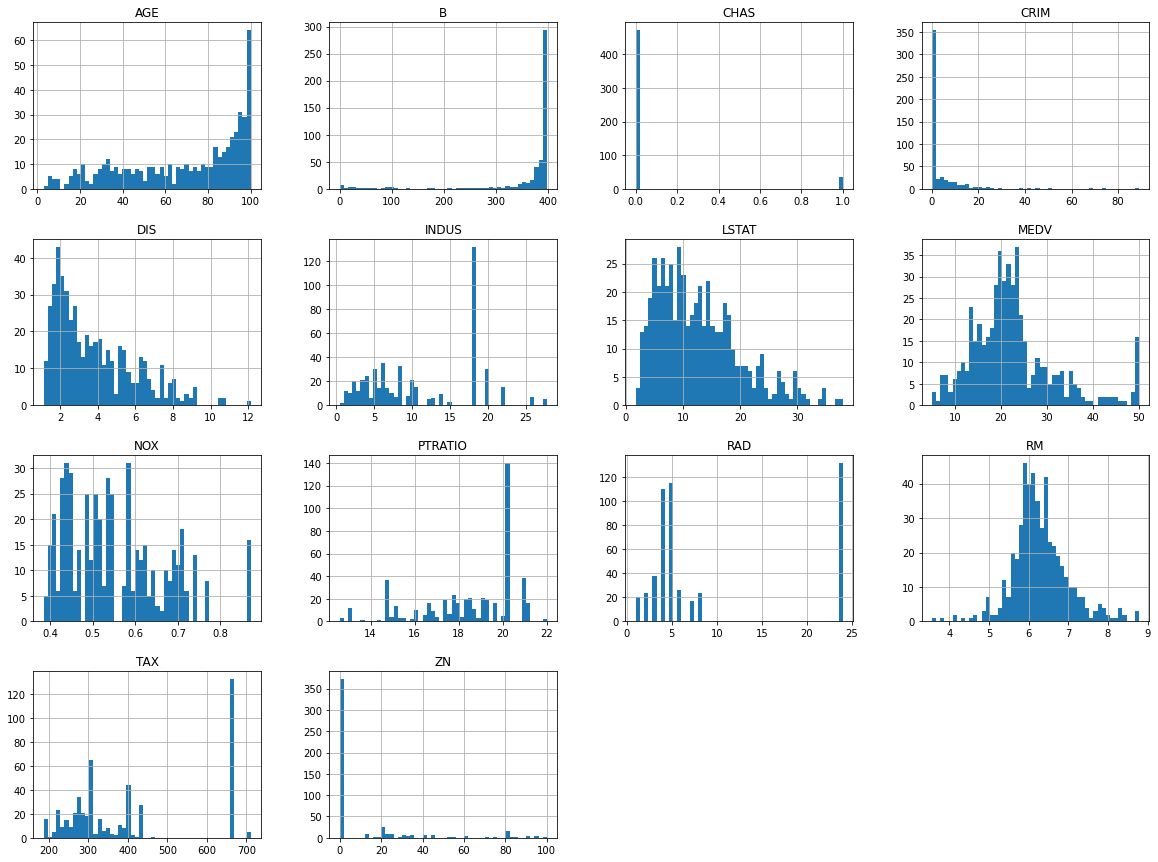

In [7]:
housing.hist(bins=50, figsize=(20,15))
#plots histograms for all features and labels

# Train-Test Spliiting

We have two options for train-test spliiting


In [8]:
import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]
#the function above can also be implimented using scikitlearn
#train_set,test_set = split_train_test(housing, 0.2)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2,random_state = 42)

In [9]:
print(f"Rows in train set:{len(train_set)}")
print(f"Rows in test set:{len(test_set)}")

Rows in train set:404
Rows in test set:102


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_test_set.info()
strat_test_set['CHAS'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


0    95
1     7
Name: CHAS, dtype: int64

# Looking for Correlations


We look for correlations inbetween labels and feature(Correlation is a statistical technique that can show whether and how strongly pairs of variables are related). 

In [12]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

Here we can say that MEDV has a high positive correlation with RM which means when the value of RM increases MEDV also increases

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000124677405E0>,
      dtype=object)

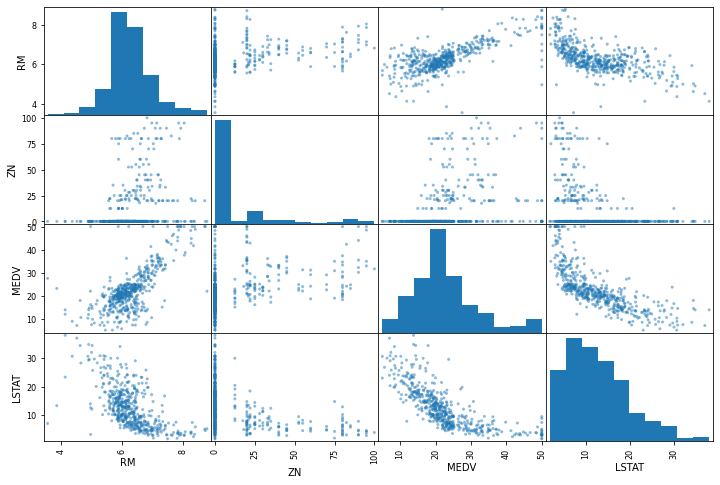

In [13]:
from pandas.plotting import scatter_matrix
attributes = ["RM","ZN","MEDV","LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,8))

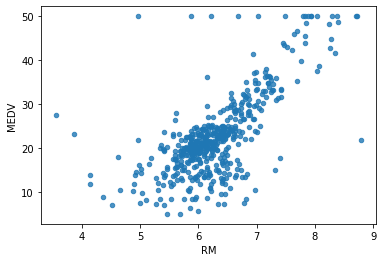

In [14]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [15]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

# Creating Pipeline

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [17]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 13)

# Selecting a Desired Model

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr,housing_labels)

LinearRegression()

In [19]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([23.99866812, 27.25283558, 20.5818147 , 25.04908672, 23.77464206])

In [20]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the Linear Regression Model

In [21]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [22]:
lin_rmse

4.835301058716238

# Trying Decision Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(housing_num_tr,housing_labels)

DecisionTreeRegressor()

In [24]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model1.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

# Evaluating the Decision Tree Regression Model

In [25]:
from sklearn.metrics import mean_squared_error
housing_predictions1 = model1.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions1)
rmse = np.sqrt(mse)

In [26]:
rmse

0.0

Overfitting(It is a modeling error that occurs when a function is too closely fit to a limited set of data points)

# Cross Validation in Decision Tree

In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, housing_num_tr, housing_labels, scoring = 'neg_mean_squared_error',cv= 10)
rmse_scores = np.sqrt(-scores)

In [28]:
rmse_scores

array([3.9566554 , 4.37010353, 4.92437937, 4.11007092, 4.16794314,
       3.72397637, 5.20016827, 3.8180165 , 3.46038293, 4.20139858])

In [29]:
#better results

In [30]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [31]:
#Decison Tree
print_scores(rmse_scores)

Scores: [3.9566554  4.37010353 4.92437937 4.11007092 4.16794314 3.72397637
 5.20016827 3.8180165  3.46038293 4.20139858]
Mean: 4.193309499590256
Standard Deviation: 0.5041256150683707


# Cross Validation in Linear Regression

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = 'neg_mean_squared_error',cv= 10)
rmse_scores_lin = np.sqrt(-scores)

In [33]:
print_scores(rmse_scores_lin)

Scores: [4.22235612 4.26438649 5.09424333 3.83081183 5.37600331 4.41092152
 7.47272243 5.48554135 4.14606627 6.0717752 ]
Mean: 5.037482786117751
Standard Deviation: 1.0594382405606948


# Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

# Cross Validation in Random Forest Regressor

In [35]:
scores = cross_val_score(model2, housing_num_tr, housing_labels, scoring = 'neg_mean_squared_error',cv= 10)
rmse_scores_random = np.sqrt(-scores)

In [36]:
print_scores(rmse_scores_random)

Scores: [2.81626145 2.95429586 4.69946462 2.71975892 3.3339128  2.56559056
 4.78542249 3.34137986 3.23134351 3.15759353]
Mean: 3.360502358363166
Standard Deviation: 0.7338789306155709


# Saving the Model

In [37]:
from joblib import dump, load
dump(model2, 'Ans.joblib')

['Ans.joblib']

# Testing the model on test data

In [38]:
X_test = strat_test_set.drop('MEDV', axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [39]:
final_rmse

4.143874870573364

In [40]:
print(final_predictions)
print(list(Y_test))

[22.69968907 17.21809545 30.02249279 30.74778916  8.89512081 13.32142051
 17.33667356 17.75884279 32.49829759 36.03953505 16.35542057  0.56736309
 23.00036857 20.45406323 20.07195268 12.94763771 31.15259787 13.42929671
 25.03377998 24.16484366 20.41376724 17.03371972 17.78872127 25.59396216
 19.48925131 32.82684685 19.43986145 33.71211148  8.03165673 34.67822079
 19.55672166 21.44813056 29.29990156 16.34255866 26.9868503  18.36287062
 37.29070365 24.57516862 22.25473001 37.13556596 25.15387036 34.46727484
 23.46332441 24.04296023 18.50218667 32.68878654 38.45633313 21.41849048
 17.66121404 16.30911908 21.22360232 12.41720203 19.93411198 20.41550492
 27.9774864  33.08886348 40.09861375 31.36242042 14.94917745 19.75561251
 40.46388017 18.11130418 15.18135521 27.6464993  19.49913588 32.4746605
 23.41651711 20.31958551 21.17791079 33.77535007 34.10374558 27.61946367
 24.52197711 21.88353054 36.17789977  8.56108814 17.44322967 21.51365153
 20.57689904 23.01502065 25.9813584  22.54880065 14.

In [41]:
print(prepared_data)

[[-0.43942006  3.12628155 -1.12165014 -0.27288841 -1.42262747 -0.23979304
  -1.31238772  2.61111401 -1.0016859  -0.5778192  -0.97491834  0.41164221
  -0.86091034]
 [-0.44352175  3.12628155 -1.35893781 -0.27288841 -1.0542567   0.5009123
  -1.3938808   2.19312325 -0.65766683 -0.78557904 -0.69277865  0.39131918
  -0.94116739]
 [ 0.15682292 -0.4898311   0.98336806 -0.27288841  0.47919371  0.28867984
   0.87020968 -0.68730678  1.63579367  1.50571521  0.81196637  0.44624347
   0.81480158]
 [-0.42292925 -0.4898311  -0.57719868 -0.27288841 -0.5573845   0.13688444
  -0.52225911  0.37882487 -0.5429938  -0.74402708  0.52982668  0.45343469
  -0.81939807]
 [-0.40786253 -0.4898311  -0.57719868 -0.27288841 -0.5573845   0.04693161
  -1.42222622  0.79643404 -0.5429938  -0.74402708  0.52982668  0.45343469
  -0.91902752]]
